In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
# tf.random.set_seed(777)  # for reproducibility

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from pso_tf import PSO

import numpy as np
import matplotlib.pyplot as plt

from datetime import date
from tqdm import tqdm
import json

print(tf.__version__)
print(tf.config.list_physical_devices())

def get_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train.reshape((60000, 28 ,28, 1))
    x_test = x_test.reshape((10000, 28 ,28, 1))

    print(f"x_train : {x_train[0].shape} | y_train : {y_train[0].shape}")
    print(f"x_test : {x_test[0].shape} | y_test : {y_test[0].shape}")
    return x_train, y_train, x_test, y_test

def make_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # model.summary()

    return model

2023-05-24 15:37:52.889357: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.10.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
'''
optimizer parameter
'''
lr = 0.1
momentun = 0.8
decay = 1e-04
nestrov = True

'''
pso parameter
'''
n_particles = 30
maxiter = 20
# epochs = 1
w = 0.8
c0 = 0.6
c1 = 1.6


x_train, y_train, x_test, y_test = get_data()
model = make_model()

loss = keras.losses.MeanSquaredError()


pso_m = PSO(model=model, loss_method=loss, n_particles=n_particles)
# c0 : 지역 최적값 중요도
# c1 : 전역 최적값 중요도
# w : 관성 (현재 속도를 유지하는 정도)
best_weights, score = pso_m.optimize(x_train, y_train, x_test, y_test, maxiter=maxiter, c0=c0, c1=c1, w=w)
model.set_weights(best_weights)

score_ = model.evaluate(x_test, y_test, verbose=2)
print(f" Test loss: {score_}")
score = round(score_[1]*100, 2)

day = date.today().strftime("%Y-%m-%d")

os.makedirs(f'./model', exist_ok=True)
model.save(f'./model/{day}_{score}_mnist.h5')
json_save = {
    "name" : f"{day}_{score}_mnist.h5",
    "score" : score_,
    "maxiter" : maxiter,
    "c0" : c0,
    "c1" : c1,
    "w" : w    
}
with open(f'./model/{day}_{score}_mnist.json', 'a') as f:
    json.dump(json_save, f)
    f.write(',\n')


# auto_tuning(n_particles=30, maxiter=1000, c0=0.5, c1=1.5, w=0.75)


x_train : (28, 28, 1) | y_train : ()
x_test : (28, 28, 1) | y_test : ()


Iter 0/20:  13%|#3        | 4/30 [00:04<00:20,  1.28it/s]

In [ ]:
loss_, acc_ = pso_m.all_history()

plt.subplot(2,1,1)
for layer in all_loss:
    plt.plot(layer)
plt.title('loss history')

plt.subplot(2,1,2)
for layer in all_acc:
    plt.plot(layer)
plt.title('acc history')

x_train : (28, 28, 1) | y_train : ()
x_test : (28, 28, 1) | y_test : ()


/home/pieroot/miniconda3/envs/pso/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
Iter 0/50: 100%|##########| 30/30 [00:15<00:00,  1.98it/s]


loss avg : 0.9084339777628581 | acc avg : 0.0019799999892711638 | best loss : 0.15219999849796295


Iter 1/50: 100%|##########| 30/30 [00:11<00:00,  2.54it/s]


loss avg : 0.9090563456217448 | acc avg : 0.0031199999153614043 | best loss : 0.20149999856948853


Iter 2/50: 100%|##########| 30/30 [00:11<00:00,  2.59it/s]


loss avg : 0.9103448867797852 | acc avg : 0.005286666750907898 | best loss : 0.20149999856948853


Iter 3/50: 100%|##########| 30/30 [00:11<00:00,  2.55it/s]


loss avg : 0.9113266626993816 | acc avg : 0.004926666617393494 | best loss : 0.20149999856948853


Iter 4/50: 100%|##########| 30/30 [00:11<00:00,  2.54it/s]


loss avg : 0.9113243738810222 | acc avg : 0.004126666734615962 | best loss : 0.20149999856948853


Iter 5/50: 100%|##########| 30/30 [00:11<00:00,  2.56it/s]


loss avg : 0.9113284428914388 | acc avg : 0.002809999883174896 | best loss : 0.20180000364780426


Iter 6/50: 100%|##########| 30/30 [00:11<00:00,  2.51it/s]


loss avg : 0.9113288243611654 | acc avg : 0.0034666667381922406 | best loss : 0.20180000364780426


Iter 7/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.9113253911336263 | acc avg : 0.0029633333285649615 | best loss : 0.20180000364780426


Iter 8/50: 100%|##########| 30/30 [00:11<00:00,  2.57it/s]


loss avg : 0.9113227208455403 | acc avg : 0.002809999883174896 | best loss : 0.20180000364780426


Iter 9/50: 100%|##########| 30/30 [00:11<00:00,  2.53it/s]


loss avg : 0.911251958211263 | acc avg : 0.005486666659514109 | best loss : 0.20180000364780426


Iter 10/50: 100%|##########| 30/30 [00:11<00:00,  2.57it/s]


loss avg : 0.9113367716471354 | acc avg : 0.004316666722297668 | best loss : 0.20180000364780426


Iter 11/50: 100%|##########| 30/30 [00:12<00:00,  2.47it/s]


loss avg : 0.9113431294759115 | acc avg : 0.002943333238363266 | best loss : 0.20180000364780426


Iter 12/50: 100%|##########| 30/30 [00:11<00:00,  2.57it/s]


loss avg : 0.9113429387410482 | acc avg : 0.004413333535194397 | best loss : 0.20180000364780426


Iter 13/50: 100%|##########| 30/30 [00:11<00:00,  2.58it/s]


loss avg : 0.9113424936930339 | acc avg : 0.004670000076293946 | best loss : 0.20180000364780426


Iter 14/50: 100%|##########| 30/30 [00:11<00:00,  2.55it/s]


loss avg : 0.9113433202107747 | acc avg : 0.0024433332184950513 | best loss : 0.20180000364780426


Iter 15/50: 100%|##########| 30/30 [00:12<00:00,  2.48it/s]


loss avg : 0.9113349914550781 | acc avg : 0.0030966666837533314 | best loss : 0.20180000364780426


Iter 16/50: 100%|##########| 30/30 [00:11<00:00,  2.57it/s]


loss avg : 0.911343765258789 | acc avg : 0.002956666549046834 | best loss : 0.20180000364780426


Iter 17/50: 100%|##########| 30/30 [00:11<00:00,  2.56it/s]


loss avg : 0.911343765258789 | acc avg : 0.002806666741768519 | best loss : 0.20180000364780426


Iter 18/50: 100%|##########| 30/30 [00:11<00:00,  2.55it/s]


loss avg : 0.911343765258789 | acc avg : 0.002503333240747452 | best loss : 0.20180000364780426


Iter 19/50: 100%|##########| 30/30 [00:12<00:00,  2.47it/s]


loss avg : 0.9113413492838541 | acc avg : 0.003179999937613805 | best loss : 0.20180000364780426


Iter 20/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.004823333521684011 | best loss : 0.20180000364780426


Iter 21/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.003663333257039388 | best loss : 0.20180000364780426


Iter 22/50: 100%|##########| 30/30 [00:11<00:00,  2.54it/s]


loss avg : 0.911343765258789 | acc avg : 0.002916666616996129 | best loss : 0.20180000364780426


Iter 23/50: 100%|##########| 30/30 [00:11<00:00,  2.55it/s]


loss avg : 0.911343765258789 | acc avg : 0.0026966666181882223 | best loss : 0.20180000364780426


Iter 24/50: 100%|##########| 30/30 [00:12<00:00,  2.43it/s]


loss avg : 0.911343765258789 | acc avg : 0.0028999999165534975 | best loss : 0.20180000364780426


Iter 25/50: 100%|##########| 30/30 [00:11<00:00,  2.56it/s]


loss avg : 0.911343765258789 | acc avg : 0.0028833332161108654 | best loss : 0.20180000364780426


Iter 26/50: 100%|##########| 30/30 [00:11<00:00,  2.55it/s]


loss avg : 0.911343765258789 | acc avg : 0.0027433333297570547 | best loss : 0.20180000364780426


Iter 27/50: 100%|##########| 30/30 [00:11<00:00,  2.59it/s]


loss avg : 0.911343765258789 | acc avg : 0.0024033332864443462 | best loss : 0.20180000364780426


Iter 28/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.004453333218892416 | best loss : 0.20180000364780426


Iter 29/50: 100%|##########| 30/30 [00:11<00:00,  2.56it/s]


loss avg : 0.911343765258789 | acc avg : 0.00338333323597908 | best loss : 0.20180000364780426


Iter 30/50: 100%|##########| 30/30 [00:12<00:00,  2.44it/s]


loss avg : 0.911343765258789 | acc avg : 0.0028333333631356556 | best loss : 0.20180000364780426


Iter 31/50: 100%|##########| 30/30 [00:11<00:00,  2.58it/s]


loss avg : 0.911343765258789 | acc avg : 0.002480000009139379 | best loss : 0.20180000364780426


Iter 32/50: 100%|##########| 30/30 [00:11<00:00,  2.58it/s]


loss avg : 0.911343765258789 | acc avg : 0.0030733334521452584 | best loss : 0.20180000364780426


Iter 33/50: 100%|##########| 30/30 [00:11<00:00,  2.58it/s]


loss avg : 0.911343765258789 | acc avg : 0.0028366667528947195 | best loss : 0.20180000364780426


Iter 34/50: 100%|##########| 30/30 [00:11<00:00,  2.58it/s]


loss avg : 0.911343765258789 | acc avg : 0.002760000030199687 | best loss : 0.20180000364780426


Iter 35/50: 100%|##########| 30/30 [00:11<00:00,  2.57it/s]


loss avg : 0.911343765258789 | acc avg : 0.002463333308696747 | best loss : 0.20180000364780426


Iter 36/50: 100%|##########| 30/30 [00:11<00:00,  2.55it/s]


loss avg : 0.911343765258789 | acc avg : 0.004286666711171468 | best loss : 0.20180000364780426


Iter 37/50: 100%|##########| 30/30 [00:12<00:00,  2.39it/s]


loss avg : 0.911343765258789 | acc avg : 0.003916666656732559 | best loss : 0.20180000364780426


Iter 38/50: 100%|##########| 30/30 [00:11<00:00,  2.59it/s]


loss avg : 0.911343765258789 | acc avg : 0.0037066665788491565 | best loss : 0.20180000364780426


Iter 39/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.003233333428700765 | best loss : 0.20180000364780426


Iter 40/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.0020900001128514607 | best loss : 0.20180000364780426


Iter 41/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.002956666549046834 | best loss : 0.20180000364780426


Iter 42/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.0028566665947437286 | best loss : 0.20180000364780426


Iter 43/50: 100%|##########| 30/30 [00:11<00:00,  2.57it/s]


loss avg : 0.911343765258789 | acc avg : 0.0026866666972637176 | best loss : 0.20180000364780426


Iter 44/50: 100%|##########| 30/30 [00:11<00:00,  2.58it/s]


loss avg : 0.911343765258789 | acc avg : 0.0045466666420300806 | best loss : 0.20180000364780426


Iter 45/50: 100%|##########| 30/30 [00:12<00:00,  2.36it/s]


loss avg : 0.911343765258789 | acc avg : 0.004050000011920929 | best loss : 0.20180000364780426


Iter 46/50: 100%|##########| 30/30 [00:11<00:00,  2.58it/s]


loss avg : 0.911343765258789 | acc avg : 0.0037399999797344207 | best loss : 0.20180000364780426


Iter 47/50: 100%|##########| 30/30 [00:11<00:00,  2.60it/s]


loss avg : 0.911343765258789 | acc avg : 0.00264999990661939 | best loss : 0.20180000364780426


Iter 48/50: 100%|##########| 30/30 [00:11<00:00,  2.61it/s]


loss avg : 0.911343765258789 | acc avg : 0.0029666667183240254 | best loss : 0.20180000364780426


Iter 49/50: 100%|##########| 30/30 [00:11<00:00,  2.56it/s]


loss avg : 0.911343765258789 | acc avg : 0.002906666696071625 | best loss : 0.20180000364780426
313/313 - 0s - loss: 27.3092 - accuracy: 0.2018 - 247ms/epoch - 788us/step
 Test loss: [27.309202194213867, 0.20180000364780426]
x_train : (28, 28, 1) | y_train : ()
x_test : (28, 28, 1) | y_test : ()
313/313 [==============================] - 0s 691us/step


진행도: 100%|██████████| 10000/10000 [00:00<00:00, 2226867.00it/s]

틀린 갯수 > 7982/10000


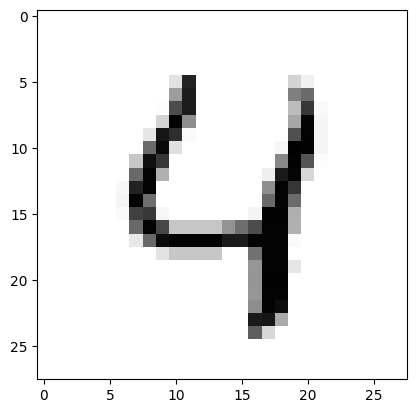

In [3]:
# print(f"정답 > {y_test}")

x_train, y_train, x_test, y_test = get_data()

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
not_correct = []
for i in tqdm(range(len(y_test)), desc="진행도"):
    if predicted_labels[i] != y_test[i]:
        not_correct.append(i)
        # print(f"추론 > {predicted_labels[i]} | 정답 > {y_test[i]}")
        
print(f"틀린 갯수 > {len(not_correct)}/{len(y_test)}")


for i in range(3):
    plt.imshow(x_test[not_correct[i]].reshape(28,28), cmap='Greys')
plt.show() 



In [4]:
def default_mnist(epochs=5):
    x_train, y_train, x_test, y_test = get_data()
    model = make_model()
    
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    wei = model.get_weights()
    model.set_weights(wei)
    score = model.evaluate(x_test, y_test, verbose=2)
    print(f"score : {score}")
    # hist = model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=1)
    # print(hist.history['loss'][-1])
    # print(hist.history['accuracy'][-1])

    # predicted_result = model.predict(x_test)
    # predicted_labels = np.argmax(predicted_result, axis=1)
    # not_correct = []
    # for i in tqdm(range(len(y_test)), desc="진행도"):
        # if predicted_labels[i] != y_test[i]:
            # not_correct.append(i)
            # print(f"추론 > {predicted_labels[i]} | 정답 > {y_test[i]}")
            
    # print(f"틀린 갯수 > {len(not_correct)}/{len(y_test)}")
# default_mnist()